-   Tyler Arista, tja9@calvin.edu
-   Student name, e-mail

# Instructions for today's practice

- Create a copy of this Jupyter Notebook and share it with your partner.
- Fill student names and e-mails in the text cell above.
- At the end of the practice, download the .ipynb file and upload it on Moodle.

# Retrieval Questions

- How each of the following steps—data wrangling, data
visualization, and data modeling—contributes to increasing the depth of
insight into a dataset?

- What are the tools we will be using for:
  - Data wrangling?
  - Visualization?
  - Modeling?
  - Communication?

# Exploring Forest Fires in Brazil

We got this dataset about [forest fires](https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil)
at Kaggle. It reports the number of forest fires in Brazil divided by
states. The series comprises the period of approximately 10 years (1998
to 2017). Data were obtained from the official website of the Brazilian
government.

> Forest fires are a serious problem for the preservation of the
> tropical forests. Understanding the frequency of forest fires in a
> time series can help to take action to prevent them. Recently, people have witnessed a lot of environmental problems due to [excessive fires around many places in South America](https://g1.globo.com/meio-ambiente/noticia/2024/08/21/amazonia-tem-pior-temporada-de-queimadas-em-17-anos-corredor-de-fumaca-se-espalha-e-afeta-10-estados.ghtml).

The data is in a CSV (comma separated values) file. The following code
block, already included, uses the `read_csv` function in pandas to load
the data into a data frame called `forest_fires`.

In [1]:
import pandas as pd
forest_fires = pd.read_csv('amazon.csv',encoding='latin-1',parse_dates=True)

> **Note**

> The `parse_dates` argument tells pandas to convert the `date` column
> to a date object, rather than leaving it as a string. (CSV files don’t
> usually specify the data *type* of each column, so we need to tell
> pandas to interpret those as dates and not as strings like
> “2011-01-01”.)

We can check some of the columns and rows with the methods `.head()`,
`.info()`, and `.shape()` (you can search for these methods to have a
better idea of what they do).

In [2]:
forest_fires.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


**📝 Exercise**: How many rows does the dataset contain? What does each
row represent?

**Answer**: This dataset contains 6454 rows. Each row represents each forest fires recorded in Brazil


## Wrangling

Let’s wrangle a little bit. This code will translate month names from
Portuguese to a number (will make easier later):

In [4]:
# replace the Brazilian months with English months
forest_fires['month'] = forest_fires['month'].replace({'Janeiro': 1,'Fevereiro':2,'Março':3,
                                  'Abril':4,'Maio':5,'Junho':6,'Julho':7,
                                  'Agosto': 8,'Setembro':9,'Outubro':10,
                                  'Novembro':11,'Dezembro':12})

Did you notice that our `date` column does not reflect exactly our
months? We need to tweak this a little bit. (No time to explain this
code now…)

In [5]:
# Convert the 'date' column to datetime format
forest_fires['date'] = pd.to_datetime(forest_fires['date'])
# Replace the month in the 'date' column with the month from the 'month' column
forest_fires['date'] = forest_fires.apply(lambda row: row['date'].replace(month=row['month']), axis=1)
forest_fires.head()

,year,state,month,number,date
0,1998,Acre,1,0.0,1998-01-01
1,1999,Acre,1,0.0,1999-01-01
2,2000,Acre,1,0.0,2000-01-01
3,2001,Acre,1,0.0,2001-01-01
4,2002,Acre,1,0.0,2002-01-01


## First visualization

Now we can create a scatter plot showing the forest fires for each date.
Sample code is provided below, but you will need to fill in the blanks.

**📝 Exercise**: Give the code for this plot.

In [18]:
import plotly.express as px
px.scatter(
    forest_fires,
    x="date", y="number",
    trendline="lowess",
    labels={"date": "Date", "number": "Number of Fires"},
    )

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Let’s deconstruct this code:

- `px.scatter` is the Plotly Express (`px`)
function we’ll use to easily construct a scatter plot. We always specify
the data frame as the first argument.

- The next arguments define the
mappings between the variables in the dataset and the aesthetics of the
plot (e.g. x and y coordinates, colors, etc.).

- The `trendline`
argument tells Plotly Express to add a smoothing trend line to the plot.
(Try removing this argument to see what happens.) Lowess is a smooth
curve; you can try switching it to `ols` to see a linear trend line.

- Finally, the `labels` argument lets us make the visualization more
hospitable by specifing the labels for the x and y axes. We pass a
dictionary with the column names as keys and the labels as values.

Does it look nice? Nah… not yet.

**📝 Exercise**: Add a new code cell that creates the same plot again,
but add a mapping of `workingday` to the `color` aesthetic. Your result
should look like this (still not so good, huh?):

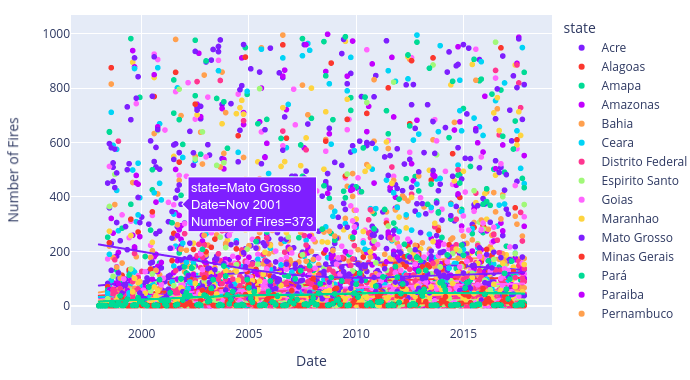

In [12]:
import plotly.express as px
px.scatter(
    forest_fires,
    x="date", y="number",
    trendline="lowess",
    labels={"date": "Date", "number": "Number of Fires"},
    color="state",
    )

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/

## More wrangling

Aren’t there too many states? (Brazil has 27 states). How can we plot at
least the states of the North region?

In [8]:
north_region_states = [
    'Acre',
    'Amapa',
    'Amazonas',
    'Pará',
    'Rondonia',
    'Roraima',
    'Tocantins'
]
less_states = forest_fires[forest_fires['state'].isin(north_region_states)]

**📝 Exercise**: Now, plot it again.


In [13]:
import plotly.express as px
px.scatter(
    less_states,
    x="date", y="number",
    trendline="lowess",
    labels={"date": "Date", "number": "Number of Fires"},
    color="state",
    )

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/

It is still too hard to see anything, right? That’s because there are
too many data points.

We could get the mean forest fires for each year. To do that:

In [10]:
mean_numbers_per_year = less_states.groupby(['year','state'])['number'].mean().reset_index()

## Trying a better visualization

**📝 Exercise**: Now, let’s plot the mean number of fires per year using our new dataframe: `mean_numbers_per_year`. By the way, should we use “scatter” ou “line”?

In [17]:
import plotly.express as px
px.scatter(
    mean_numbers_per_year,
    x="year", y="number",
    trendline="lowess",
    labels={"year": "Year", "number": "Number of Fires"},
    color="state",
    )

**📝 Exercise**: write a one or two sentence interpretation of the
graph, focusing on the following question: \*How do the number of fires
compare according to state and year?

**Answer**: The graph shows that the number of forest fires in northern Brazil changes depending on the state and year. Tocantins and Amazonas tend to have more fires than the other states, and in most cases, the number of fires has gone up or stayed the same over time.

# Reflection

Congratulations! We are already doing data science.

**📝 Exercise**: Did you notice how using Python and a Jupyter Notebook can be better than using an Excel spreadsheet? In what aspects is this preferable?

**Answer**: Using Python and Jupyter Notebooks can be better than Excel because they handle large data, automating tasks, and running complex calculations more easily. Python also allows you to reuse your work more efficiently.

**📝 Reflection Exercise**: Write a sentence or two of your overall
reflections on this practice. You may write whatever you want, but you
might perhaps respond to one or two of these questions:

-   Was anything unclear about this assignment?
-   How hard was it for you? Where did you get “stuck”?
-   How long did it take you?
-   What questions or uncertainties remain?
-   What skills do you think you’ll need more practice with?
-   Did you try anything out of curiosity that you weren’t specifically
    asked to do?

**Reflection Response**: I don't believe there was anything unclear about this assignment. The way this practice broke down data wrangling, data visualization, and data modeling into sections, made it very easy to understand. And since I have had some experience with python before, this assignment only took me about 15-20 mintues.